<a href="https://colab.research.google.com/github/JErry453/HomevalueAI/blob/main/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/INTERNSHIP/Delhi_v2.csv')
df1.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [ ]:
df1.shape

(7738, 18)

## **Data Cleaning**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [ ]:
for column in df1.columns:
  print(df1[column].value_counts())
  print("*"*20)

Unnamed: 0
0       1
5198    1
5166    1
5165    1
5164    1
       ..
2575    1
2574    1
2573    1
2572    1
7737    1
Name: count, Length: 7738, dtype: int64
********************
price
4500000.0    290
3500000.0    252
4000000.0    247
6000000.0    243
5500000.0    223
            ... 
6860000.0      1
5290000.0      1
8450000.0      1
7670000.0      1
4510000.0      1
Name: count, Length: 584, dtype: int64
********************
Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [ ]:
df2=df1.drop(['latitude','longitude','Bathrooms','Balcony','Status','neworold','parking','Furnished_status','Lift','Landmarks','type_of_building','desc','Unnamed: 0'],axis = 'columns')
df2.head()

,price,Address,area,Bedrooms,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,4592.592593


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7738 non-null   float64
 1   Address     7738 non-null   object 
 2   area        7738 non-null   float64
 3   Bedrooms    7738 non-null   float64
 4   Price_sqft  7738 non-null   float64
dtypes: float64(4), object(1)
memory usage: 302.4+ KB


In [ ]:
df2.isnull().sum()

,0
price,0
Address,0
area,0
Bedrooms,0
Price_sqft,0


In [ ]:
for column in df2.columns:
  print(df2[column].value_counts())
  print("*"*20)

price
4500000.0    290
3500000.0    252
4000000.0    247
6000000.0    243
5500000.0    223
            ... 
6860000.0      1
5290000.0      1
8450000.0      1
7670000.0      1
4510000.0      1
Name: count, Length: 584, dtype: int64
********************
Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                                1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR      1
Rajnagar Extension Gahziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR         1
R

# **Feature Engineering**

In [ ]:
df2.head()

,price,Address,area,Bedrooms,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,4592.592593


In [ ]:
len(df2.Address.unique())

4145

In [ ]:
df2.Address=df2.Address.apply(lambda x : x.strip())

In [ ]:
Address_stats=df2.groupby('Address')['Address'].agg('count').sort_values(ascending=False)
Address_stats

,Address
Address,
"Raj Nagar Extension, Ghaziabad, Delhi NCR",163
"Indirapuram, Ghaziabad, Delhi NCR",152
"Greater Noida West, Greater Noida, Delhi NCR",100
"Noida Extension, Noida, Delhi NCR",63
"Crossings Republik, Ghaziabad, Delhi NCR",61
...,...
"Godrej woods sector 43, Sector 43, Noida, Delhi NCR",1
"Golf Course Road, Gurgaon, Delhi NCR",1
"Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR",1


In [ ]:
len(Address_stats[Address_stats<=10])

4056

In [ ]:
Address_less_10=Address_stats[Address_stats<=10]
len(Address_less_10.unique())

10

In [ ]:
df2.Address=df2.Address.apply(lambda x: 'Other' if x in Address_less_10 else x)
len(df2.Address.unique())

90

In [ ]:
df2.Address.value_counts()

,count
Address,
Other,5621
"Raj Nagar Extension, Ghaziabad, Delhi NCR",163
"Indirapuram, Ghaziabad, Delhi NCR",152
"Greater Noida West, Greater Noida, Delhi NCR",100
"Noida Extension, Noida, Delhi NCR",63
...,...
"Sector 86, Faridabad, Delhi NCR",11
"Sector 86, Gurgaon, Delhi NCR",11
"Sector 70, Gurgaon, Delhi NCR",11


In [ ]:
df2.head(10)

,price,Address,area,Bedrooms,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,6918.238994
3,3810000.0,Other,1050.0,2.0,3628.571429
4,6200000.0,Other,1350.0,2.0,4592.592593
5,3700000.0,Other,1150.0,2.0,3217.391304
6,3270000.0,Other,890.0,2.0,3674.157303
7,3990000.0,Other,850.0,2.0,4694.117647
8,3500000.0,Other,960.0,2.0,3645.833333
9,5500000.0,Other,1400.0,3.0,3928.571429


# **Outlier Removal**

In [ ]:
df2.describe()

,price,area,Bedrooms,Price_sqft
count,7.738000e+03,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,5543.660241
std,7.223197e+06,718.929581,0.877026,2408.659307
min,1.700000e+06,501.000000,2.000000,2100.000000
25%,4.200000e+06,990.000000,2.000000,3950.986915
50%,6.000000e+06,1250.000000,3.000000,4972.674332
75%,9.500000e+06,1650.000000,3.000000,6350.638693
max,8.500000e+07,9500.000000,10.000000,44378.698225


In [ ]:
df2[df2.area/df2.Bedrooms<300].head()

,price,Address,area,Bedrooms,Price_sqft
10,7300000.0,Other,850.0,3.0,8588.235294
42,2400000.0,Other,540.0,2.0,4444.444444
47,4800000.0,Other,1232.0,6.0,3896.103896
114,7000000.0,Other,559.0,2.0,12522.361360
117,2630000.0,Other,750.0,3.0,3506.666667


In [ ]:
df2.shape

(7738, 5)

In [ ]:
df3=df2[~(df2.area/df2.Bedrooms<300)]
df3.shape

(7451, 5)

In [ ]:
df3.describe()

,price,area,Bedrooms,Price_sqft
count,7.451000e+03,7451.000000,7451.000000,7451.000000
mean,8.444595e+06,1434.195410,2.683130,5498.470996
std,7.303485e+06,719.381041,0.812393,2259.931840
min,1.700000e+06,600.000000,2.000000,2100.000000
25%,4.200000e+06,1000.000000,2.000000,3923.260950
50%,6.000000e+06,1265.000000,3.000000,4948.453608
75%,9.700000e+06,1660.000000,3.000000,6321.784150
max,8.500000e+07,9500.000000,10.000000,25925.925926


In [ ]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('Address'):
    m = np.mean(subdf.Price_sqft)
    st = np.std(subdf.Price_sqft)
    reduced_df=subdf[(subdf.Price_sqft>(m-st)) & (subdf.Price_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df4=remove_pps_outliers(df3)
df4.shape


(5530, 5)

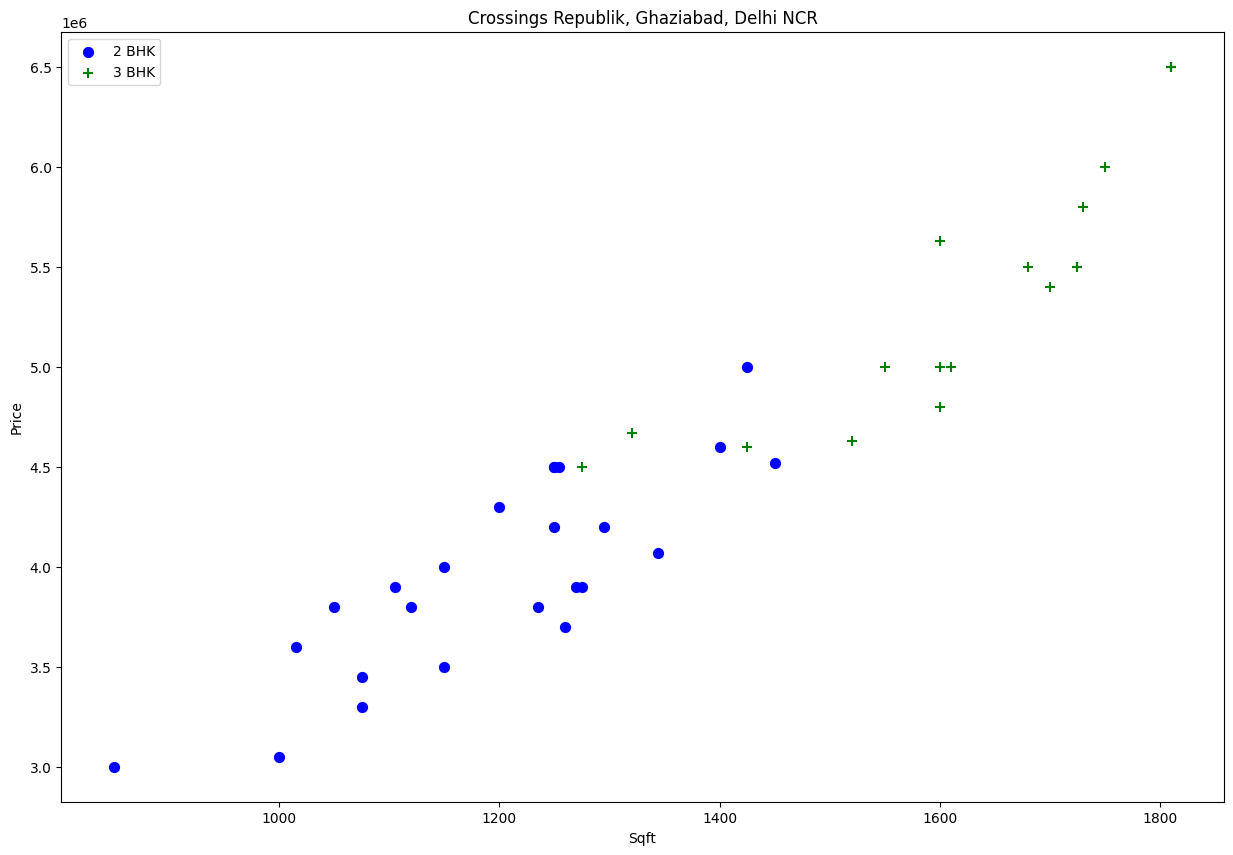

In [ ]:
def plot_scatter_chart(df,Address):
  bhk2=df[(df.Address==Address) & (df.Bedrooms==2)]
  bhk3=df[(df.Address==Address) & (df.Bedrooms==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.area,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel("Sqft")
  plt.ylabel("Price")
  plt.title(Address)
  plt.legend()

plot_scatter_chart(df4,"Crossings Republik, Ghaziabad, Delhi NCR")

In [ ]:
def bhk_outlier_remover(df):
  exclude_indices = np.array([])
  for Address,Address_df in df.groupby('Address'):
    bhk_stats = {}
    for bhk,bhk_df in Address_df.groupby('Bedrooms'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.Price_sqft),
          'std':np.std(bhk_df.Price_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in Address_df.groupby('Bedrooms'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df5=bhk_outlier_remover(df4)
df5.shape



(4404, 5)

# Scatter Plot Before Outlier Removal

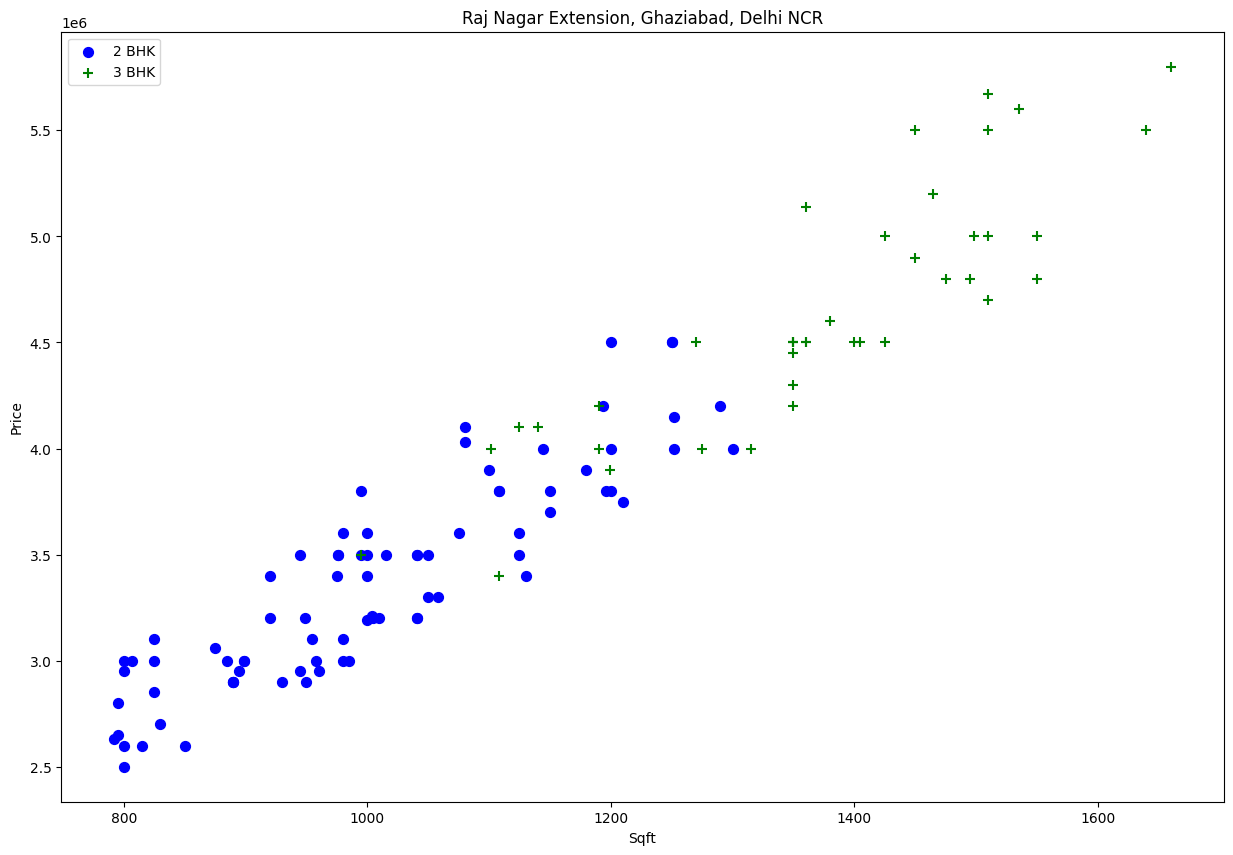

In [ ]:
plot_scatter_chart(df4,"Raj Nagar Extension, Ghaziabad, Delhi NCR")

# Scatter Plot After Outlier Removal

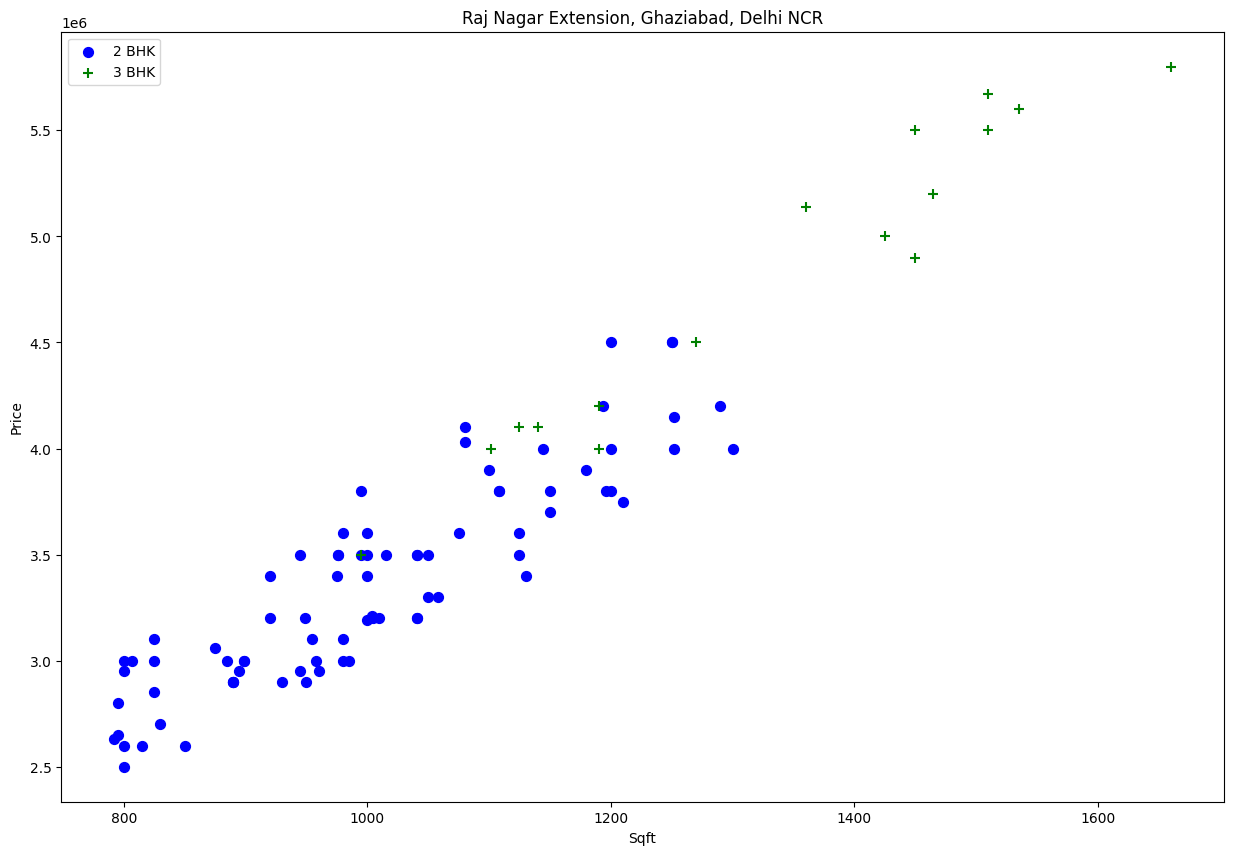

In [ ]:
plot_scatter_chart(df5,"Raj Nagar Extension, Ghaziabad, Delhi NCR")

Text(0, 0.5, 'Count')

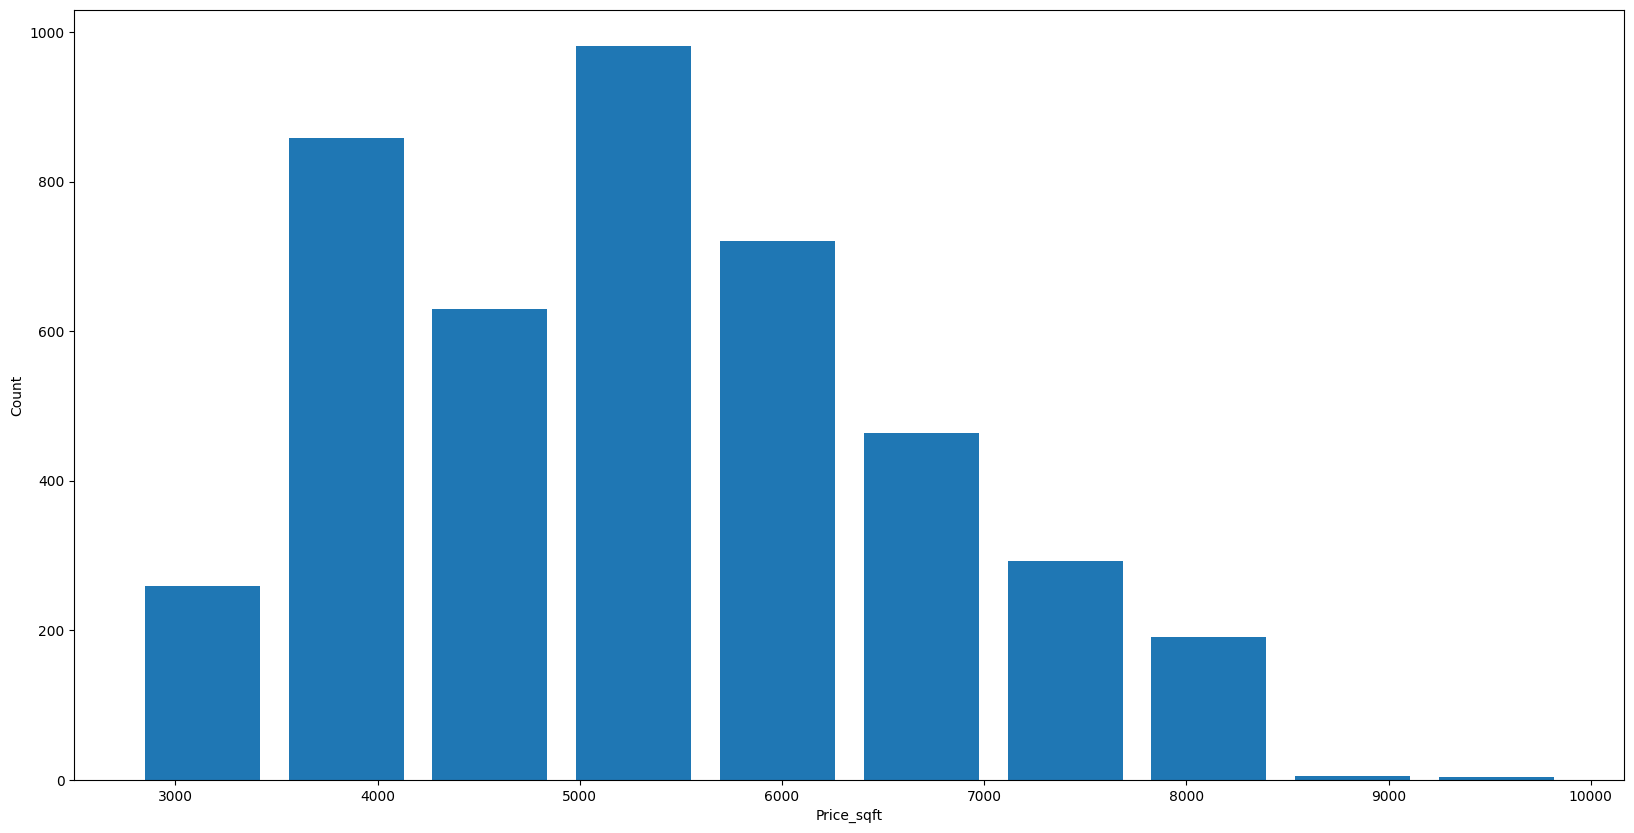

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df5.Price_sqft,rwidth=0.8)
plt.xlabel("Price_sqft")
plt.ylabel("Count")

In [ ]:
df5.drop(columns=['Price_sqft'],inplace=True)

In [ ]:
df5.to_csv("Delhi3.csv")

# Linear Regression

In [ ]:
x=df5.drop('price',axis='columns')
x.head()

,Address,area,Bedrooms
0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1595.0,3.0
1,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,3.0
2,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1073.0,2.0
3,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,3.0
4,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1300.0,2.0


In [ ]:
y=df5.price
y.head()

,price
0,7000000.0
1,8000000.0
2,4700000.0
3,7000000.0
4,6000000.0


Data Split:Train +Test


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=104)
print(x_train.shape)
print(x_test.shape)

(3523, 3)
(881, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
#r_clf=LinearRegression()
#lr_clf.fit(x_train,y_train)
#lr_clf.score(x_test,y_test)
#y_predict=lr_clf.predict(x_test)
#print("Mean Squared error is:",r2_score(y_test,y_predict))
#plt.scatter(y_test,y_predict)

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['Address']),remainder='passthrough')

In [ ]:
scaler=StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe=make_pipeline(column_trans,scaler,lr)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Address'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8872225813329783

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel1.pk','wb'))